# Connect to a database
In order to get data from a database with pandas, you first need to be able to connect to one. In this exercise, you'll practice creating a database engine to manage connections to a database, data.db. To do this, you'll use sqlalchemy's create_engine() function.

create_engine() needs a string URL to the database. For SQLite databases, that string consists of "sqlite:///", then the database file name.

In [1]:
# Import sqlalchemy's create_engine() function
from sqlalchemy import create_engine

In [2]:
# Create the database engine
engine = create_engine('sqlite:///' + '../datasets/data.db')

# View the tables in the database
print(engine.table_names())

['boro_census', 'hpd311calls', 'weather']


# Load entire tables
In the last exercise, you saw that data.db has two tables. weather has historical weather data for New York City. hpd311calls is a subset of call records made to the city's 311 help line about housing issues.

In this exercise, you'll use the read_sql() function in pandas to load both tables. read_sql() accepts a string of either a SQL query to run, or a table to load. It also needs a way to connect to the database, like the engine in the provided code.

In [3]:
# Load libraries
import pandas as pd
from sqlalchemy import create_engine

# Create the database engine
engine = create_engine('sqlite:///' + '../datasets/data.db')

# Load hpd311calls without any SQL
hpd_calls = pd.read_sql('hpd311calls', engine)

# View the first few rows of data
print(hpd_calls.head())

  unique_key created_date agency  complaint_type incident_zip  \
0   38070822   01/01/2018    HPD  HEAT/HOT WATER        10468   
1   38065299   01/01/2018    HPD        PLUMBING        10003   
2   38066653   01/01/2018    HPD  HEAT/HOT WATER        10452   
3   38070264   01/01/2018    HPD  HEAT/HOT WATER        10032   
4   38072466   01/01/2018    HPD  HEAT/HOT WATER        11213   

       incident_address community_board    borough  
0    2786 JEROME AVENUE        07 BRONX      BRONX  
1  323 EAST   12 STREET    03 MANHATTAN  MANHATTAN  
2  1235 GRAND CONCOURSE        04 BRONX      BRONX  
3  656 WEST  171 STREET    12 MANHATTAN  MANHATTAN  
4       1030 PARK PLACE     08 BROOKLYN   BROOKLYN  


In [4]:
# Create the database engine
engine = create_engine('sqlite:///' + '../datasets/data.db')

# Create a SQL query to load the entire weather table
query = """
SELECT * 
  FROM weather;
"""

# Load weather with the SQL query
weather = pd.read_sql(query, engine)

# View the first few rows of data
print(weather.head())

       station                         name  latitude  longitude  elevation  \
0  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
1  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
2  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
3  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
4  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   

         date     month  awnd  prcp  snow tavg  tmax  tmin  
0  12/01/2017  December  5.37  0.00   0.0         52    42  
1  12/02/2017  December  3.13  0.00   0.0         48    39  
2  12/03/2017  December  2.01  0.00   0.0         48    42  
3  12/04/2017  December  3.58  0.00   0.0         51    40  
4  12/05/2017  December  6.71  0.75   0.0         61    50  


# Selecting columns with SQL
Datasets can contain columns that are not required for an analysis, like the weather table in data.db does. Some, such as elevation, are redundant, since all observations occurred at the same place, while others contain variables we are not interested in. After making a database engine, you'll write a query to SELECT only the date and temperature columns, and pass both to read_sql() to make a data frame of high and low temperature readings.

pandas has been loaded as pd, and create_engine() has been imported from sqlalchemy.

Note: The SQL checker is quite picky about column positions and expects fields to be selected in the specified order.

In [5]:
# Create database engine for data.db
engine = create_engine('sqlite:///' + '../datasets/data.db')

# Write query to get date, tmax, and tmin from weather
query = """
SELECT date, 
       tmax, 
       tmin
  FROM weather;
"""

# Make a data frame by passing query and engine to read_sql()
temperatures = pd.read_sql(query, engine)

# View the resulting data frame
(temperatures)

,date,tmax,tmin
0,12/01/2017,52,42
1,12/02/2017,48,39
2,12/03/2017,48,42
3,12/04/2017,51,40
4,12/05/2017,61,50
...,...,...,...
116,03/27/2018,47,34
117,03/28/2018,52,38
118,03/29/2018,53,49
119,03/30/2018,62,44


# Selecting rows
SQL WHERE clauses return records whose values meet the given criteria. Passing such a query to read_sql() results in a data frame loaded with only records we are interested in, so there is less filtering to do later on.

The hpd311calls table in data.db has data on calls about various housing issues, from maintenance problems to information requests. In this exercise, you'll use SQL to focus on calls about safety.

pandas has been loaded as pd, and a database engine, engine, has been created for data.db.

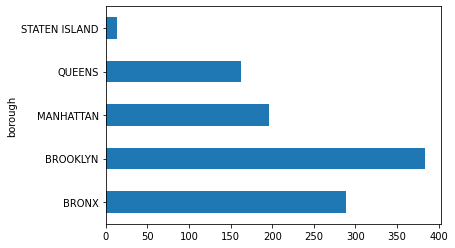

In [6]:
import matplotlib.pyplot as plt

# Create query to get hpd311calls records about safety
query = """
SELECT *
FROM hpd311calls
WHERE complaint_type = 'SAFETY';
"""

# Query the database and assign result to safety_calls
safety_calls = pd.read_sql(query, engine)

# Graph the number of safety calls by borough
call_counts = safety_calls.groupby('borough').unique_key.count()
call_counts.plot.barh()
plt.show()

# Filtering on multiple conditions
So far, you've selectively imported records that met a single condition, but it's also common to filter datasets on multiple criteria. In this exercise, you'll do just that.

The weather table contains daily high and low temperatures and precipitation amounts for New York City. Let's focus on inclement weather, where there was either an inch or more of snow or the high was at or below freezing (32° Fahrenheit). To do this, you'll need to build a query that uses the OR operator to look at values in both columns.

pandas is loaded as pd, and a database engine, engine, has been created.

In [7]:
# Create query for records with max temps <= 32 or snow >= 1
query = """
SELECT *
  FROM weather
  WHERE tmax <= 32
  OR snow >= 1;
"""

# Query database and assign result to wintry_days
wintry_days = pd.read_sql(query, engine)

# View summary stats about the temperatures
wintry_days.describe()

,latitude,longitude,elevation,awnd,prcp,snow,tmax,tmin
count,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,25.00000,25.000000,25.000000,25.000000
mean,4.077898e+01,-7.396925e+01,4.270000e+01,7.739600,0.17600,1.332000,27.320000,17.160000
std,7.251946e-15,1.450389e-14,7.251946e-15,2.621778,0.36947,2.685256,7.122266,7.673982
min,4.077898e+01,-7.396925e+01,4.270000e+01,3.130000,0.00000,0.000000,13.000000,5.000000
25%,4.077898e+01,-7.396925e+01,4.270000e+01,5.820000,0.00000,0.000000,22.000000,11.000000
50%,4.077898e+01,-7.396925e+01,4.270000e+01,7.830000,0.00000,0.000000,28.000000,17.000000
75%,4.077898e+01,-7.396925e+01,4.270000e+01,9.170000,0.09000,1.200000,31.000000,20.000000
max,4.077898e+01,-7.396925e+01,4.270000e+01,12.970000,1.41000,9.800000,40.000000,33.000000


# Getting distinct values
Sometimes an analysis doesn't need every record, but rather unique values in one or more columns. Duplicate values can be removed after loading data into a data frame, but it can also be done at import with SQL's DISTINCT keyword.

Since hpd311calls contains data about housing issues, we would expect most records to have a borough listed. Let's test this assumption by querying unique complaint_type/borough combinations.

pandas has been imported as pd, and the database engine has been created as engine.

Note: The SQL checker is quite picky about column positions and expects fields to be selected in the specified order.

In [8]:
# Create query for unique combinations of borough and complaint_type
query = """
SELECT DISTINCT borough, 
       complaint_type
  FROM hpd311calls;
"""

# Load results of query to a data frame
issues_and_boros = pd.read_sql(query, engine)

# Check assumption about issues and boroughs
print(issues_and_boros)

          borough    complaint_type
0           BRONX    HEAT/HOT WATER
1       MANHATTAN          PLUMBING
2       MANHATTAN    HEAT/HOT WATER
3        BROOKLYN    HEAT/HOT WATER
4          QUEENS    HEAT/HOT WATER
..            ...               ...
60      MANHATTAN  OUTSIDE BUILDING
61      MANHATTAN          ELEVATOR
62       BROOKLYN  OUTSIDE BUILDING
63  STATEN ISLAND            SAFETY
64  STATEN ISLAND  OUTSIDE BUILDING

[65 rows x 2 columns]


# Counting in groups
In previous exercises, you pulled data from tables, then summarized the resulting data frames in pandas to create graphs. By using COUNT and GROUP BY in a SQL query, we can pull those summary figures from the database directly.

The hpd311calls table has a column, complaint_type, that categorizes call records by issue, such as heating or plumbing. In order to graph call volumes by issue, you'll write a SQL query that COUNTs records by complaint type.

pandas has been imported as pd, and the database engine for data.db has been created as engine.

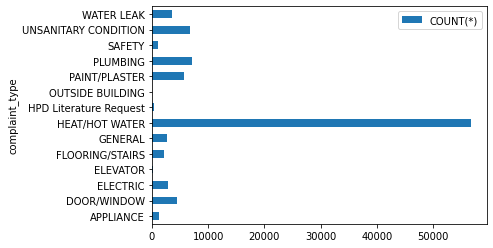

In [9]:
# Create query to get call counts by complaint_type
query = """
SELECT complaint_type, 
    COUNT(*)
  FROM hpd311calls
  GROUP BY complaint_type;
"""

# Create data frame of call counts by issue
calls_by_issue = pd.read_sql(query, engine)

# Graph the number of calls for each housing issue
calls_by_issue.plot.barh(x="complaint_type")
plt.show()

# Working with aggregate functions
If a table contains data with higher granularity than is needed for an analysis, it can make sense to summarize the data with SQL aggregate functions before importing it. For example, if you have data of flood event counts by month but precipitation data by day, you may decide to SUM precipitation by month.

The weather table contains daily readings for four months. In this exercise, you'll practice summarizing weather by month with the MAX, MIN, and SUM functions.

pandas has been loaded as pd, and a database engine, engine, has been created.

In [10]:
# Create a query to get month and max tmax by month
query = """
SELECT month, 
       MAX(tmax)
  FROM weather 
  GROUP BY month;"""

# Get data frame of monthly weather stats
weather_by_month = pd.read_sql(query, engine)

# View weather stats by month
(weather_by_month)

,month,MAX(tmax)
0,December,61
1,February,78
2,January,61
3,March,62


In [11]:
# Create a query to get month, max tmax, and min tmin by month
query = """
SELECT month, 
	   MAX(tmax), 
       MIN(tmin)
  FROM weather 
 GROUP BY month;
"""

# Get data frame of monthly weather stats
weather_by_month = pd.read_sql(query, engine)

# View weather stats by month
(weather_by_month)

,month,MAX(tmax),MIN(tmin)
0,December,61,9
1,February,78,16
2,January,61,5
3,March,62,27


In [12]:
# Create query to get temperature and precipitation by month
query = """
SELECT month, 
        MAX(tmax), 
        MIN(tmin),
        SUM(prcp)
  FROM weather 
 GROUP BY month;
"""

# Get data frame of monthly weather stats
weather_by_month = pd.read_sql(query, engine)

# View weather stats by month
(weather_by_month)

,month,MAX(tmax),MIN(tmin),SUM(prcp)
0,December,61,9,2.21
1,February,78,16,5.83
2,January,61,5,2.18
3,March,62,27,5.17


# Joining tables
Tables in relational databases usually have key columns of unique record identifiers. This lets us build pipelines that combine tables using SQL's JOIN operation, instead of having to combine data after importing it.

The records in hpd311calls often concern issues, like leaks or heating problems, that are exacerbated by weather conditions. In this exercise, you'll join weather data to call records along their common date columns to get everything in one data frame. You can assume these columns have the same data type.

pandas is loaded as pd, and the database engine, engine, has been created.

Note: The SQL checker is picky about join table order -- it expects specific tables on the left and the right.

In [13]:
# Query to join weather to call records by date columns
query = """
SELECT * 
  FROM hpd311calls
  JOIN weather 
  ON hpd311calls.created_date = weather.date;
"""

# Create data frame of joined tables
calls_with_weather = pd.read_sql(query, engine)

# View the data frame to make sure all columns were joined
(calls_with_weather.head())

,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough,station,name,...,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,38070822,01/01/2018,HPD,HEAT/HOT WATER,10468,2786 JEROME AVENUE,07 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
1,38065299,01/01/2018,HPD,PLUMBING,10003,323 EAST 12 STREET,03 MANHATTAN,MANHATTAN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
2,38066653,01/01/2018,HPD,HEAT/HOT WATER,10452,1235 GRAND CONCOURSE,04 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
3,38070264,01/01/2018,HPD,HEAT/HOT WATER,10032,656 WEST 171 STREET,12 MANHATTAN,MANHATTAN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
4,38072466,01/01/2018,HPD,HEAT/HOT WATER,11213,1030 PARK PLACE,08 BROOKLYN,BROOKLYN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7


# Joining and filtering
Just as you might not always want all the data in a single table, you might not want all columns and rows that result from a JOIN. In this exercise, you'll use SQL to refine a data import.

Weather exacerbates some housing problems more than others. Your task is to focus on water leak reports in hpd311calls and assemble a dataset that includes the day's precipitation levels from weather to see if there is any relationship between the two. The provided SQL gets all columns in hpd311calls, but you'll need to modify it to get the necessary weather column and filter rows with a WHERE clause.

pandas is loaded as pd, and the database engine, engine, has been created.

In [14]:
# Query to get hpd311calls and precipitation values
query = """
SELECT hpd311calls.*, weather.prcp
  FROM hpd311calls
  JOIN weather
  ON hpd311calls.created_date = weather.date;"""

# Load query results into the leak_calls data frame
leak_calls = pd.read_sql(query, engine)

# View the data frame
(leak_calls.head())

,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough,prcp
0,38070822,01/01/2018,HPD,HEAT/HOT WATER,10468,2786 JEROME AVENUE,07 BRONX,BRONX,0.0
1,38065299,01/01/2018,HPD,PLUMBING,10003,323 EAST 12 STREET,03 MANHATTAN,MANHATTAN,0.0
2,38066653,01/01/2018,HPD,HEAT/HOT WATER,10452,1235 GRAND CONCOURSE,04 BRONX,BRONX,0.0
3,38070264,01/01/2018,HPD,HEAT/HOT WATER,10032,656 WEST 171 STREET,12 MANHATTAN,MANHATTAN,0.0
4,38072466,01/01/2018,HPD,HEAT/HOT WATER,11213,1030 PARK PLACE,08 BROOKLYN,BROOKLYN,0.0


In [ ]:
# Query to get water leak calls and daily precipitation
query = """
SELECT hpd311calls.*, weather.prcp
  FROM hpd311calls
  JOIN weather
    ON hpd311calls.created_date = weather.date
  WHERE hpd311calls.complaint_type = 'WATER LEAK';"""

# Load query results into the leak_calls data frame
leak_calls = pd.read_sql(query, engine)

# View the data frame
print(leak_calls.head())

# Joining, filtering, and aggregating
In this exercise, you'll use what you've learned to assemble a dataset to investigate how the number of heating complaints to New York City's 311 line varies with temperature.

In addition to the hpd311calls table, data.db has a weather table with daily high and low temperature readings for NYC. We want to get each day's count of heat/hot water calls with temperatures joined in. This can be done in one query, which we'll build in parts.

In part one, we'll get just the data we want from hpd311calls. Then, in part two, we'll modify the query to join in weather data.

pandas has been imported as pd, and the database engine has been created as engine.

In [18]:
# Query to get heat/hot water call counts by created_date
query = """
SELECT hpd311calls.created_date, 
       COUNT(*)
  FROM hpd311calls 
  WHERE hpd311calls.complaint_type == 'HEAT/HOT WATE'
  GROUP BY hpd311calls.created_date;
"""

# Query database and save results as df
df = pd.read_sql(query, engine)

# View first 5 records
print(df.head())

Empty DataFrame
Columns: [created_date, COUNT(*)]
Index: []


In [17]:
# Modify query to join tmax and tmin from weather by date
query = """
SELECT hpd311calls.created_date, 
	   COUNT(*), 
       weather.tmax,
       weather.tmin
  FROM hpd311calls 
       JOIN weather
       ON hpd311calls.created_date = weather.date
 WHERE hpd311calls.complaint_type = 'HEAT/HOT WATER' 
 GROUP BY hpd311calls.created_date;
 """

# Query database and save results as df
df = pd.read_sql(query, engine)

# View first 5 records
(df.head())

,created_date,COUNT(*),tmax,tmin
0,01/01/2018,4597,19,7
1,01/02/2018,4362,26,13
2,01/03/2018,3045,30,16
3,01/04/2018,3374,29,19
4,01/05/2018,4333,19,9
